In [1]:
import sys
sys.path.append('../src')

from module.linear import Linear
from loss.mse_loss import MSELoss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy.random as rd

In [3]:
class RegLin:
    """ Classe pour la régression linéaire par réseau de neurones.
    """
    def __init__(self):
        self.mse = MSELoss()
        self.linear = None
        self.list_loss = []

    def fit(self, xtrain, ytrain, niter=100, gradient_step=1e-5):
        """ Réalise la régression linéaire sur les données d'apprentissage.
            @param xtrain: float array x array, données d'apprentissage
            @param ytrain: int array, labels sur les données d'apprentissage
            @param niter: int, nombre d'itérations
            @param gradient_step: float, pas de gradient
        """
        
        _, output_size = ytrain.shape
        _, input_size = xtrain.shape
        
        self.linear = Linear(input_size, output_size)

        # Ajout d'un biais aux données
        #xtrain = add_bias(xtrain)

        # Initialisation de la loss
        self.list_loss = []
        
        for i in range(niter):

            # ETAPE 1: Calcul de l'état du réseau (phase forward)
            yhat = self.linear.forward(xtrain)
                
            # ETAPE 2: Phase backward (rétro-propagation du gradient de la loss
            #          par rapport aux paramètres et aux entrées)
            last_delta = self.mse.backward(ytrain, yhat)
            delta = self.linear.backward_delta(xtrain, last_delta)

            self.linear.backward_update_gradient(xtrain, delta)

            # ETAPE 3: Mise à jour des paramètres du réseau (matrice de poids w)
            self.linear.update_parameters(gradient_step)
            self.linear.zero_grad()

            self.list_loss.append(np.mean(self.mse.forward(ytrain, yhat)))
            
            
        # Calcul de la loss
        self.last_loss = self.list_loss[-1]

    def predict(self, xtest):
        """ Prédiction sur des données. Il s'agit simplement d'un forward sur
            la couche linéaire.
        """
        return self.linear.forward(xtest)


In [4]:
def mainLineaire(a=10, sigma=2, niter=1000):
    # On décide arbitrairement d'un coefficient directeur a
    print('\nCoefficient directeur réel:', a)
    
    # Génération des données d'entraînement
    xtrain = np.array( [ x for x in np.linspace(0, 2.0, 100) ] ).reshape(-1,1)
    ytrain = np.array( [ a * x + rd.uniform(-sigma,sigma) for x in np.linspace(0,2.0,100) ] )
    
    # Création de notre modèle de régression linéaire
    rl = RegLin()
    
    # Phase d'entraînement puis prédiction des classes des données de xtrain
    rl.fit(xtrain, ytrain.reshape(-1,1), niter=niter, gradient_step=1e-5)
    
    w = rl.linear._parameters[0][0]
    print('Coefficient linéaire prédit:', w)
    
    # Affichage de la loss
    print("\nErreur mse :", rl.last_loss )
    
    print(rl.list_loss)
        
    # Affichage des données et de la droite prédite
    toPlot = [ w * x[0] for x in xtrain ]
    plt.figure()
    plt.title('Régression linéaire, a = {}, â = {}, erreur = {}'.format(a, round(rl.linear._parameters[0][0], 2), round(rl.last_loss, 1)))
    plt.scatter(xtrain.reshape(1,-1), ytrain, s = 1, c = 'midnightblue', label='data')
    plt.plot(xtrain.reshape(1,-1)[0], toPlot, color = 'mediumslateblue', label='model')
    plt.legend()

    plt.figure()
    plt.title('Evolution de la loss')
    plt.plot(rl.list_loss, label='loss', c='darkseagreen')
    plt.legend()
    plt.xlabel('Nombre d\'itérations')
    
    return xtrain, ytrain


Coefficient directeur réel: 10
Coefficient linéaire prédit: 10.060035786333144

Erreur mse : 1.3775810555247392
[123.11674237234925, 122.77195355869495, 122.41936490308677, 122.05883898221522, 121.69023797886894, 121.31342380350776, 120.9282582229895, 120.53460299664404, 120.13232001988423, 119.72127147553428, 119.30131999304984, 118.87232881579304, 118.43416197651554, 117.98668448119038, 117.52976250131881, 117.06326357482311, 116.58705681561928, 116.10101313194473, 115.60500545349355, 115.09890896739158, 114.5826013630171, 114.05596308564601, 113.51887759887256, 112.97123165572467, 112.41291557835979, 111.84382354619224, 111.26385389226414, 110.67290940763328, 110.0708976535086, 109.45773128081869, 108.83332835685366, 108.19761269857017, 107.55051421210031, 106.89196923795055, 106.22192090132361, 105.54031946693871, 104.84712269766857, 104.14229621625137, 103.42581386927549, 102.69765809257427, 101.95782027710489, 101.20630113432267, 100.44311106000183, 99.66827049538865, 98.8818102

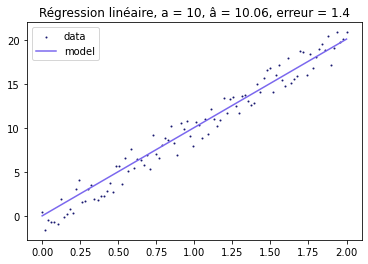

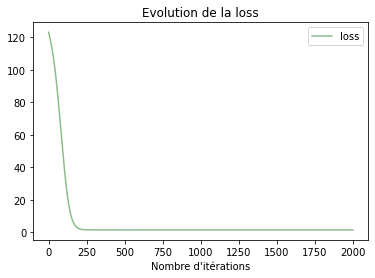

In [9]:
x, y = mainLineaire(niter=2000)

In [17]:
x.shape

(100, 1)

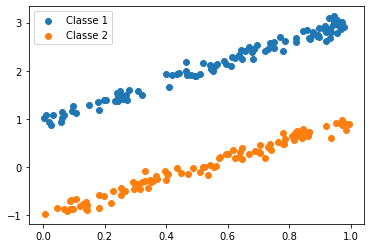

In [6]:
num_samples = 100
# pour la première classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c
m = 2
c = 1
x1 = np.random.rand(num_samples)
y1 = m * x1 + c + np.random.randn(num_samples) * 0.1
# pour la deuxième classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c2
c2 = -1
x2 = np.random.rand(num_samples)
y2 = m * x2 + c2 + np.random.randn(num_samples) * 0.1

# Afficher les nuages de points
plt.scatter(x1, y1, label='Classe 1')
plt.scatter(x2, y2, label='Classe 2')
plt.legend()
plt.show()

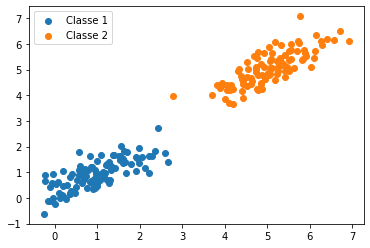

In [7]:
mu1 = np.array([1, 1])
mu2 = np.array([5, 5])
sigma = np.array([[0.5, 0.4], [0.4, 0.5]])

# Générer des données gaussiennes linéairement séparables
num_samples = 100
x1, y1 = np.random.multivariate_normal(mu1, sigma, num_samples).T
x2, y2 = np.random.multivariate_normal(mu2, sigma, num_samples).T

# Afficher les nuages de points
plt.scatter(x1, y1, label='Classe 1')
plt.scatter(x2, y2, label='Classe 2')
plt.legend()
plt.show()

In [8]:
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
         #melange de 2 gaussiennes
         xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//2)
         xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//2)
         data=np.vstack((xpos,xneg))
         y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y.reshape(-1, 1)

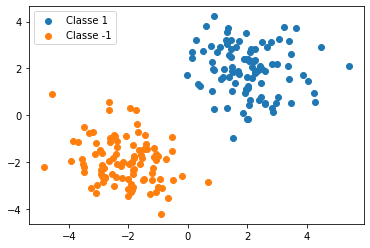

In [9]:
num_samples = 100
x1 = np.random.randn(num_samples, 2) + np.array([2, 2])
x2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
X = np.vstack((x1, x2))
Y = np.hstack((np.ones(num_samples), -np.ones(num_samples)))

# Afficher les nuages de points
plt.scatter(x1[:, 0], x1[:, 1], label='Classe 1')
plt.scatter(x2[:, 0], x2[:, 1], label='Classe -1')
plt.legend()
plt.show()


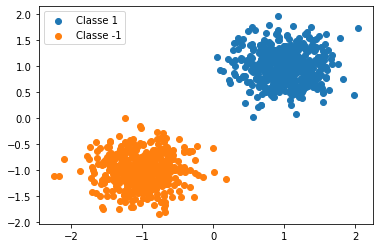

In [10]:
X, y = gen_arti(data_type=0)
y = y.reshape(-1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Classe 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Classe -1')
plt.legend()
plt.show()